In [8]:
!pip install scipy

In [9]:
!pip install sklearn

In [10]:
!pip install pandas

In [11]:
!pip install seaborn

In [12]:
#  Begin with a check of the software.

# The version of python
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy 
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy 
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas 
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn 
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.9.7 (default, May 22 2022, 10:16:48) 
[Clang 13.1.6 (clang-1316.0.21.2.5)]
scipy: 1.8.1
numpy: 1.22.4
matplotlib: 3.5.2
pandas: 1.4.2
sklearn: 1.1.1


In [13]:
import pandas

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#  Enable inline plotting from matplotlib

%matplotlib inline

#  Set some styles for seaborn

sns.set(style="white", color_codes=True)

In [14]:
#  Load the dataset into a pandas dataframe named 'iris'
#  The dataset resides at the University of California - Irvine.
#  https://archive.ics.uci.edu/ml/datasets/iris
#  The UCI dataset repository has many datasets available for your use.
#  All have been curated and well studied.

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

#  Define the names of the variables as we want them

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris = pandas.read_csv(url, names=names)

In [15]:
#  Identify the type of dataset
#  Expect it to be a pandas dataframe

print (type(iris))

<class 'pandas.core.frame.DataFrame'>


In [16]:
print(iris.shape)

(150, 5)


In [17]:
print(iris.head(20))

    sepal-length  sepal-width  petal-length  petal-width      species
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [18]:
print(iris.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [19]:
print(iris.groupby('species').size())


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


<Figure size 2304x1152 with 0 Axes>

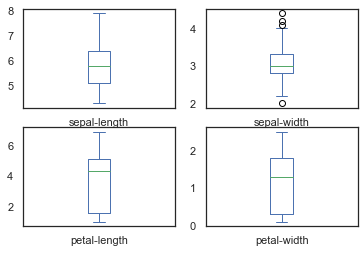

In [20]:
plt.figure(figsize=(8,4),dpi=288)
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

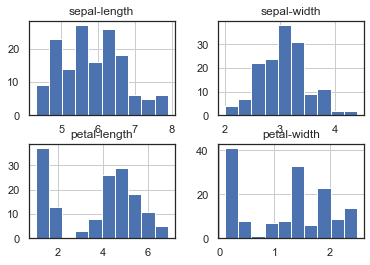

In [22]:
#  Create and show histograms
#  Each plot is of all 150 data elements

iris.hist()
plt.show()

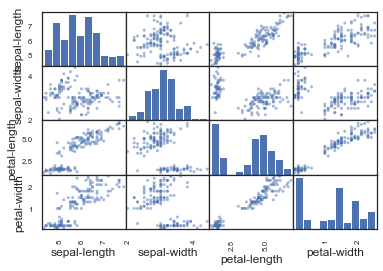

In [23]:
#  Create and show a scatter plot matrix

scatter_matrix(iris)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='sepal-length', ylabel='sepal-width'>

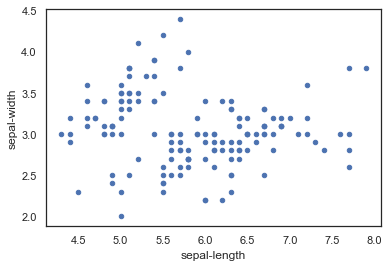

In [24]:
#  Use the .plot extension from Pandas dataframes to make a scatterplot of the Iris features.

iris.plot(kind="scatter", x="sepal-length", y="sepal-width")

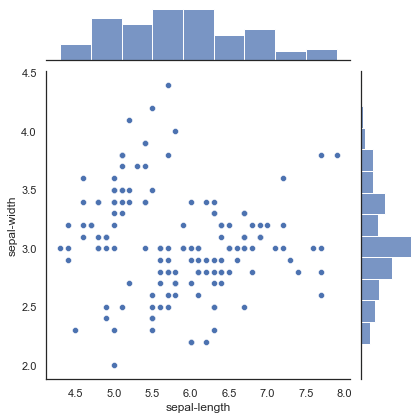

In [25]:
#  Use the seaborn library to make a similar plot
#  A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure

sns.jointplot(x="sepal-length", y="sepal-width", data=iris, height=6)

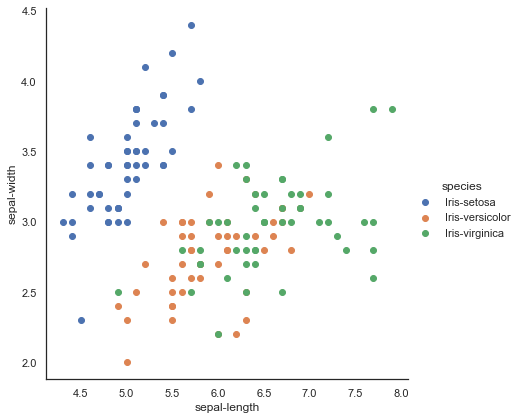

In [33]:
#  Use seaborn's FacetGrid to color the scatterplot by species

sns.FacetGrid(iris, hue="species", height=6) \
   .map(plt.scatter, "sepal-length", "sepal-width") \
   .add_legend()

<AxesSubplot:xlabel='species', ylabel='petal-length'>

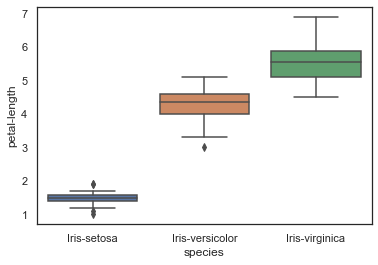

In [27]:
#  We can look at an individual feature in seaborn using a boxplot

#  This plot shows that Iris-setosa can be separated from the other
#  two species by a straight line drawn horizontally from
#  a petal length value of about 2.5

sns.boxplot(x="species", y="petal-length", data=iris)

<AxesSubplot:xlabel='species', ylabel='petal-length'>

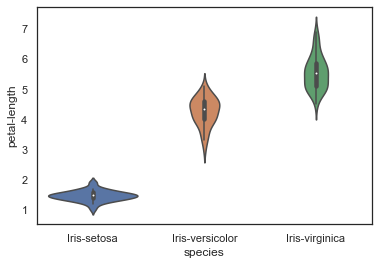

In [36]:
#  A violin plot combines the benefits of the previous two plots and simplifies them
#  Denser regions of the data are fatter, and sparser thiner in a violin plot

sns.violinplot(x="species", y="petal-length", data=iris, height=6)

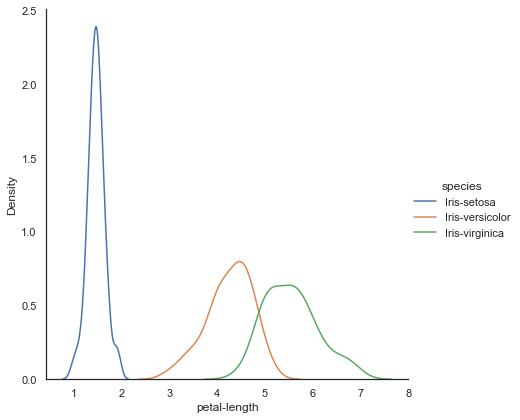

In [34]:
#  Another plot useful for looking at univariate relations is the kdeplot,
#  which creates and visualizes a kernel density estimate of the underlying feature

#  We again see that Iris-setosa is linearly separable from the other two species,
#  but Iris-versicolor and Iris-virginica overlap in petal-length.

sns.FacetGrid(iris, hue="species", height=6) \
   .map(sns.kdeplot, "petal-length") \
   .add_legend()

/Users/rebeccapeltz/.pyenv/versions/3.9.7/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


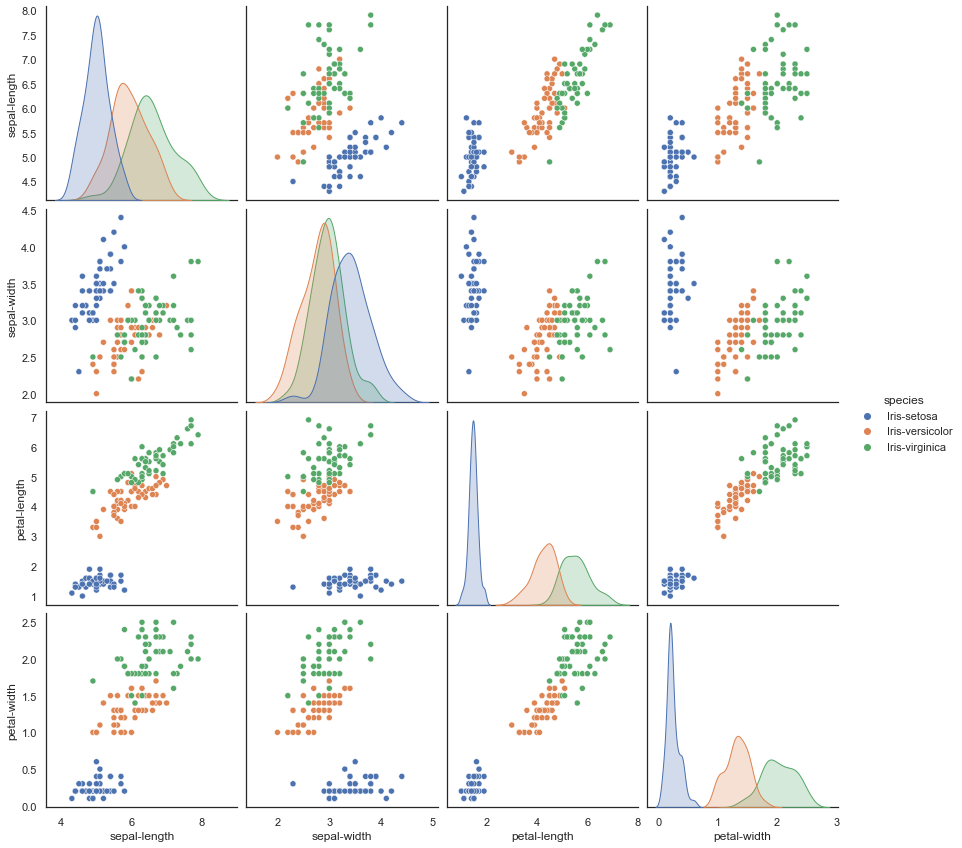

In [30]:
#  This is the seaborn pairplot, which shows the bivariate relation
#  between each pair of features
# 
#  From the pairplot, we'll see that the Iris-setosa species is separated from the other
#  two across all feature combinations

sns.pairplot(iris, hue="species", size=3)

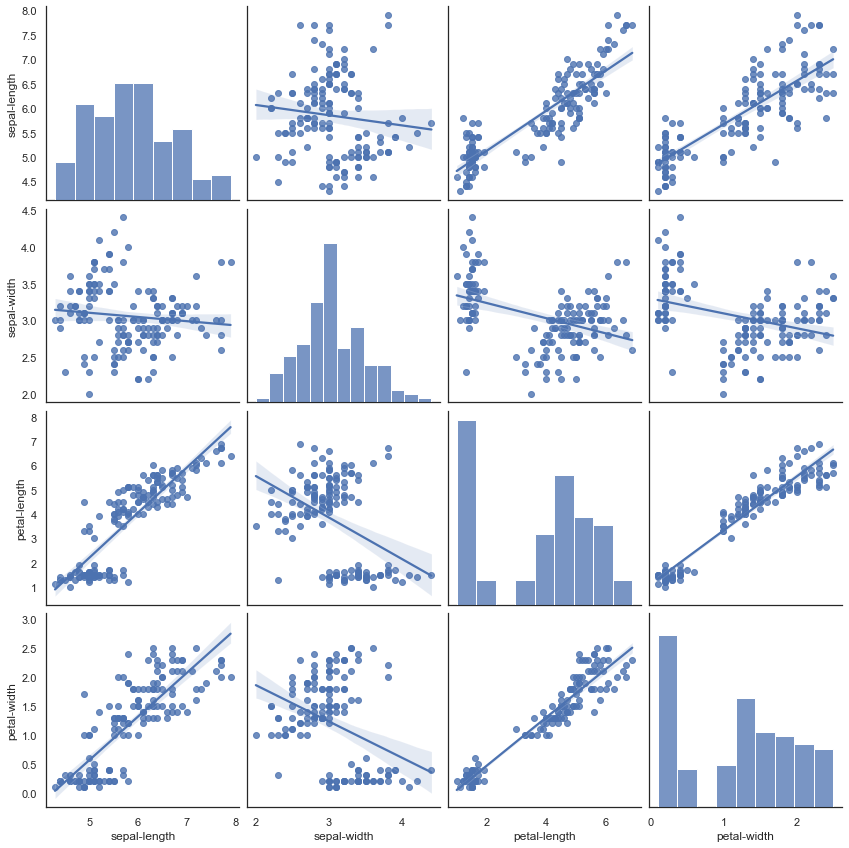

In [35]:
#  Seaborn computes and plots the regression for each atribute, 
#  all species combined

sns.pairplot(iris, kind="reg", height=3)

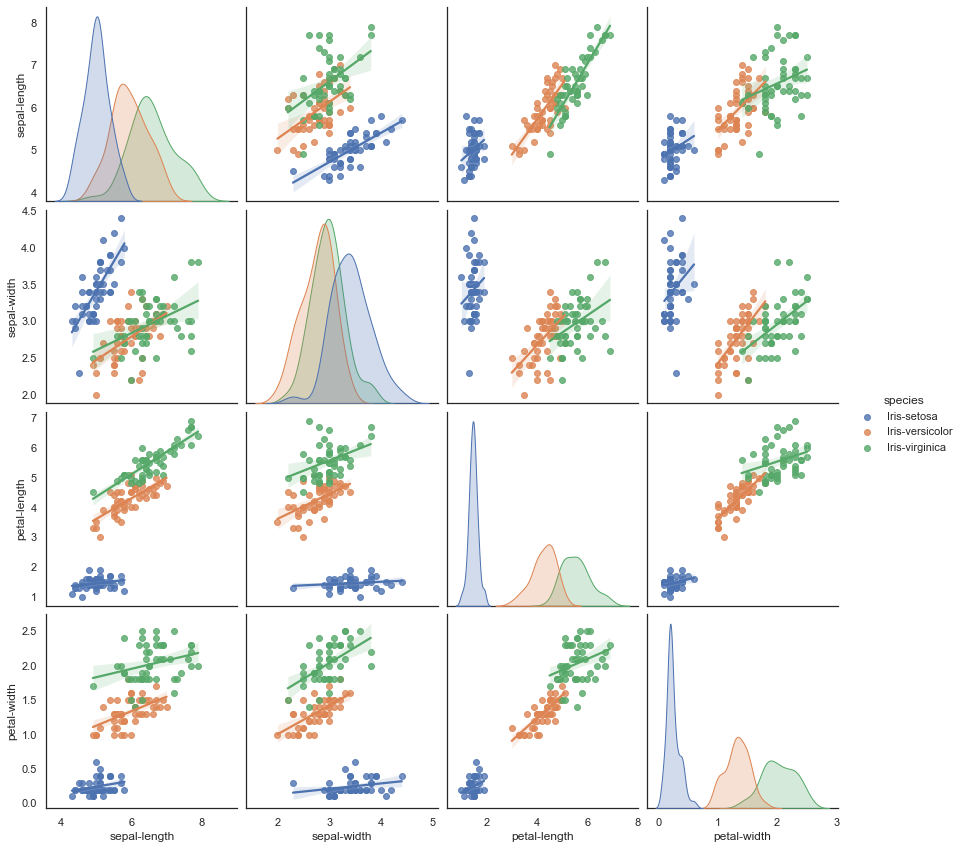

In [32]:
#  Or one regression for each species

sns.pairplot(iris, hue="species", kind="reg", height=3)